# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- Define the problem ----

The goal of this project is to analyze how the job features will affect one's salary. Then, we are going to predict salaries when given a new set of job features.

In [37]:
#import general df lib
import pandas as pd
import numpy as np

#import visiualization lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import ml lib
import sklearn as sk

#My info
__author__ = "Binny Tsai"
__email__ = "binny.tsai@gmail.com"

## Part 2 - DISCOVER

### ---- Load  and Examine the data ----

In [3]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('../data/train_features.csv')
train_salaries = pd.read_csv('../data/train_salaries.csv')
test_features = pd.read_csv('../data/test_features.csv')

In [4]:
#examine the data
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [18]:
train_features.info()
train_features.describe(include ='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN
top,JOB1362685332385,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000


In [20]:
train_salaries.info()
train_salaries.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


,jobId,salary
count,1000000,1000000.000000
unique,1000000,NaN
top,JOB1362685332385,NaN
freq,1,NaN
mean,NaN,116.061818
std,NaN,38.717936
min,NaN,0.000000
25%,NaN,88.000000
50%,NaN,114.000000
75%,NaN,141.000000


We observe that the minimum vales for salary contain 0 which don't quite make sense so we should investigate those datas. Next, we need to clean the data such as duplicate rows, missing values, and corrupt data.

### ---- 3 Clean the data ----

In [25]:
#Check for duplicate data
train_features.duplicated().sum()

0

In [23]:
train_salaries.duplicated().sum()

0

In [30]:
#Check for missing values
train_features.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [31]:
train_salaries.isnull().sum()

jobId     0
salary    0
dtype: int64

In [42]:
#merge the trainning sets
train_merge = pd.merge(train_features, train_salaries, how = 'left', on= 'jobId')

In [43]:
train_merge.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [44]:
#check for salary=0
train_merge[train_merge['salary']==0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [45]:
#We want to drop the above rows since these jobs are unlikely to be unpaid
train_merge = train_merge[train_merge.salary!=0]

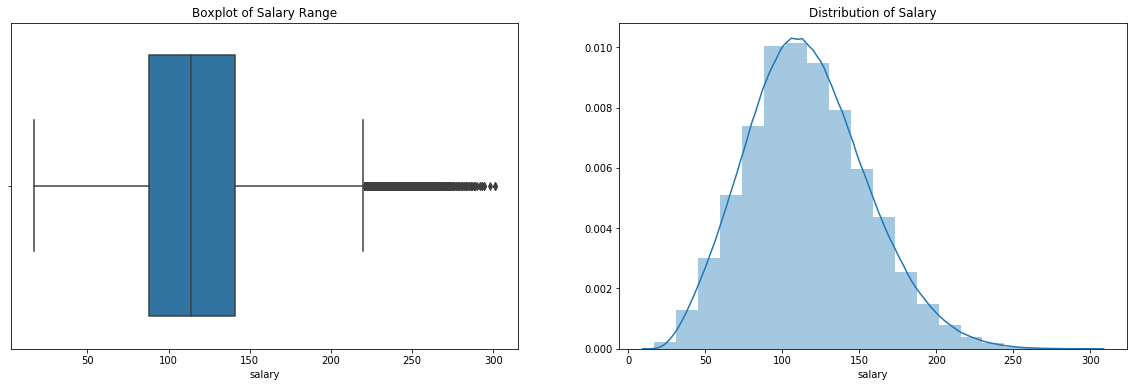

In [57]:
#check for outliers and distribution of salary
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(train_merge['salary'])
plt.title('Boxplot of Salary Range')
plt.xlabel('salary')

plt.subplot(1,2,2)
sns.distplot(train_merge['salary'],bins=20)
plt.title('Distribution of Salary')
plt.show()

In [61]:
#identify outliers
IQR = train_merge.salary.describe()['75%'] - train_merge.salary.describe()['25%']
train_merge.salary.describe()[6]+1.5*IQR

220.5

In [78]:
outliers = train_merge[train_merge.salary >= 220.5]
pd.pivot_table(outliers,values=['salary','yearsExperience'], index = ['jobType','industry'], aggfunc = np.mean)

salary  yearsExperience
jobType        industry                              
CEO            AUTO       232.228261        21.065217
               EDUCATION  228.312500        21.737500
               FINANCE    237.408342        19.061471
               HEALTH     233.148936        20.088146
               OIL        237.454724        18.852362
               SERVICE    230.669565        21.608696
               WEB        235.834459        19.630068
CFO            AUTO       230.142857        21.585714
               EDUCATION  226.866667        22.800000
               FINANCE    234.465587        19.937247
               HEALTH     230.829457        21.162791
               OIL        235.076763        20.066390
               SERVICE    228.000000        22.066667
               WEB        234.126437        20.478927
CTO            AUTO       229.622642        21.735849
               EDUCATION  225.941176        22.411765
               FINANCE    234.322034        19.802966
               HEALTH     232.160000        21.704000
               OIL        235.222656        19.599609
               SERVICE    228.970588        21.588235
               WEB        233.370909        20.330909
JUNIOR         FINANCE    229.000000        21.875000
               OIL        227.090909        23.272727
               WEB        226.000000        24.000000
MANAGER        AUTO       224.333333        22.666667
               FINANCE    232.868421        21.368421
               HEALTH     227.875000        22.875000
               OIL        231.360000        21.230000
               WEB        230.666667        21.266667
SENIOR         AUTO       221.000000        24.000000
               FINANCE    229.655172        22.206897
               HEALTH     223.000000        22.000000
               OIL        229.407407        22.222222
               WEB        228.625000        22.375000
VICE_PRESIDENT AUTO       228.214286        22.428571
               EDUCATION  226.000000        22.000000
               FINANCE    232.338095        20.209524
               HEALTH     231.051282        21.410256
               OIL        233.781818        20.995455
               SERVICE    228.333333        23.166667
               WEB        230.681416        21.194690

In [75]:
outliers['jobType'].value_counts().sort_values(ascending=False)

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [80]:
outliers[outliers.jobType=='JUNIOR']

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


### Summary of Data Cleanning:

- There are no duplicate data.
- There are no miss values.
- We dropped 5 rows with salary equals to 0 because these datas might be incorrectly recorded. 
- We noticed that most upper outliers are executives and senior levels which makes sense that their salaries are high. We won't drop them. 
- The upper outliers who are junior levels are mostly in finance and oil industries with many years of experience. They also held masters or doctoral degrees, major in business or engineer. Therefore, they are expected to have high salary.

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data